### Open Air Test Objective
The results from this test will inform propeller selection for the rest of our testing. While we expect duct aerodynamics to change relative propeller performance, this test will ensure we are capable of producing enough thrust for our application (hovering flight with a payload).

Props that produce significantly less thrust than required to lift a payload (~12 N) will be eliminated and a propeller with high power efficiency around the 12 N range will be selected, with slight preference toward high efficiency in the 8 N range (flight without payload) and high full throttle thrust.

This test will also validate full throttle performance of our new motors as their lower KV rating will result in a reduced maximum test rpm. We must ensure that they spin our propellers fast enough to produce the thrust required for flight with a payload.

### Procedure
- Initiate sweep from 0-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Open Air Test Configurations
| Propeller Type    | Propeller Diameter    | Propeller Pitch  | Propeller Tip Profile | Test Status |
|-                  |-                      |-                 |-                      |-            |
| HQ Prop 6-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| HQ Prop 3-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| Toroidal 2-blade  | 5.1 in / 129.54 mm    |  4.5             | Unshaved              | In Progress |
| White 3-blade     | 7 in / 177.8 mm       |  3.5             | Unshaved              | In Progress |
| HQ Prop 4-blade   | 6 in / 152.4 mm       |  3.8             | Unshaved              | In Progress |
| HQ Prop 6-blade   | TBD                   |  4               | Shaved                | Blocked     |

### Hypothesis
- For propellers of the same diameter, we expect configurations with higher blade count and higher pitch to produce greater thrust. We expect low pitch, low blade count propellers to produce less thrust, but have higher thrust-power efficiency. 
- As propeller diameter is increased, both thrust and thrust-power efficiency are expected to improve.

### Analysis
Average battery voltage, motor currents, and thrust will be collected for each throttle step after the transients stabilize, and a thrust vs. electrical power plot will be made to compare all props.

### Observations

For our first few full throttle tests, we noticed our thrust start to decrease as throttle went above about 75%, the root cause of this was determined to be the movable carriage hitting the end stops, which were taking up some of the load since the jig was remounted to a new base and the relative positioning of components changed since the last test.

In [188]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [189]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)
#step_range = [10]

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [190]:
test_directory = Path("../test_data/open_air/")
data_dict = {}

In [191]:
data_dict["test_5in_6blade"] = test_run(
    filename=test_directory / "test_5in_6blade.csv", plan=plan
)
# data_dict["test_5in_4blade_blue"] = test_run(
#     filename=test_directory / "test_5in_4blade_blue.csv", plan=plan
# )
# data_dict["test_6in_4blade"] = test_run(
#     filename=test_directory / "test_6in_4blade.csv", plan=plan
# )
# data_dict["test_7in_3blade"] = test_run(
#     filename=test_directory / "test_7in_3blade.csv", plan=plan
# )
data_dict["test_5in_toroidal"] = test_run(
    filename=test_directory / "test_5in_toroidal.csv", plan=plan
)
data_dict["test_5in_3blade"] = test_run(
    filename=test_directory / "test_5in_3blade.csv", plan=plan
)
data_dict["test_5in_6blade_rerun"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun.csv", plan=plan
)
data_dict["test_5in_3blade_rerun"] = test_run(
    filename=test_directory / "test_5in_3blade_rerun.csv", plan=plan
)
data_dict["test_5in_3blade_rerun_0"] = test_run(
    filename=test_directory / "test_5in_3blade_rerun_0.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_0"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_0.csv", plan=plan
)
data_dict["test_5in_toroidal_rerun"] = test_run(
    filename=test_directory / "test_5in_toroidal_rerun.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 286,1385,1342,16.841999,10.240000,0.087240,-0.208650,0.179907,-0.002696

Rx: 4175,0,0,16.841999,10.240000,0.072700,-0.208650,0.179907,-0.002696

Rx: 7159,0,0,16.841999,10.240000,0.087240,-0.236470,0.179907,-0.002696

Rx: 10167,0,0,16.820999,10.240000,0.130860,-0.111280,0.179907,-0.002696

Rx: 13159,0,0,16.841999,10.240000,0.1599

### Data Analysis

In [192]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name               time_ms                                      
test_5in_6blade         0.446                0.0               0.0   
                        5.174                0.0               0.0   
                        8.154                0.0               0.0   
                        11.162               0.0               0.0   
                        14.154               0.0               0.0   
...                                          ...               ...   
test_5in_toroidal_rerun 41970.163         1171.0            1157.0   
                        41973.167         1100.0            1128.0   
                        41976.171         1100.0            1085.0   
                        41979.167         1000.0            1057.0   
                        41982.172         1000.0            1014.0   

                                   batt_voltage_V  batt_current_A  \
test_name               time_ms                                     
test_5in_6blade         0.446           18.018000           10.24   
                        5.174           17.240999           10.24   
                        8.154           17.052000           10.24   
                        11.162          16.926001           10.24   
                        14.154          16.841999           10.24   
...                                           ...             ...   
test_5in_toroidal_rerun 41970.163       16.275000           10.24   
                        41973.167       16.254000           10.24   
                        41976.171       16.254000           10.24   
                        41979.167       16.296000           10.24   
                        41982.172       16.275000           10.24   

                                   top_current_A  bottom_current_A  thrust_N  \
test_name               time_ms                                                
test_5in_6blade         0.446            0.08724          -0.36166 -0.130701   
                        5.174            0.14540          -0.29211 -0.130701   
                        8.154            0.08724          -0.25038 -0.130701   
                        11.162           0.10178          -0.22256 -0.130701   
                        14.154           0.15994          -0.20865 -0.130701   
...                                          ...               ...       ...   
test_5in_toroidal_rerun 41970.163        0.36350          -0.00000  0.456869   
                        41973.167        0.17448           0.02782  0.456869   
                        41976.171        0.13086          -0.08346  0.456869   
                        41979.167        0.30534          -0.01391  0.456869   
                        41982.172        0.15994           0.06955  0.456869   

                                   torque_N  
test_name               time_ms              
test_5in_6blade         0.446     -0.000675  
                        5.174     -0.000675  
                        8.154     -0.000675  
                        11.162    -0.000675  
                        14.154    -0.000675  
...                                     ...  
test_5in_toroidal_rerun 41970.163  0.003332  
                        41973.167  0.003332  
                        41976.171  0.003332  
                        41979.167  0.003332  
                        41982.172  0.003332  

[110091 rows x 8 columns]

In [193]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_3blade_rerun"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.321,0.0,1028.0,16.820999,10.24,0.14540,-0.18083,0.415607,0.001113
4.175,0.0,0.0,16.820999,10.24,0.13086,-0.20865,0.415607,0.001113
7.159,0.0,0.0,16.841999,10.24,0.07270,-0.27820,0.415607,0.001113
10.167,0.0,0.0,16.820999,10.24,0.08724,-0.29211,0.415607,0.001113
13.159,0.0,0.0,16.841999,10.24,0.05816,-0.18083,0.415607,0.001113
...,...,...,...,...,...,...,...,...
41970.159,1028.0,1028.0,16.023001,10.24,0.15994,-0.31993,1.165514,0.005809
41973.163,971.0,1000.0,16.023001,10.24,0.29080,-0.23647,1.165514,0.005809
41976.159,971.0,985.0,16.023001,10.24,0.15994,-0.23647,1.165514,0.005809


In [194]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [195]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .mean()
)

df_steps

top_motor_rpm  bottom_motor_rpm  \
test_name               throttle                                    
test_5in_3blade         5           1755.638037       1762.487730   
                        10          3148.245399       3146.815951   
                        15          4425.843077       4447.944615   
                        20          5617.714724       5734.122699   
                        25          6850.245399       6914.877301   
...                                         ...               ...   
test_5in_toroidal_rerun 80         19215.732523      19175.267477   
                        85         20172.051672      20070.188450   
                        90         20948.027692      20927.950769   
                        95         21634.058282      21613.472393   
                        100        22317.837920      22240.021407   

                                  batt_voltage_V  batt_current_A  \
test_name               throttle                                   
test_5in_3blade         5              16.871117       10.240000   
                        10             16.860102       10.240000   
                        15             16.835279       10.240000   
                        20             16.807407       10.240000   
                        25             16.748723       10.240000   
...                                          ...             ...   
test_5in_toroidal_rerun 80             15.926681       21.215805   
                        85             15.767809       24.051550   
                        90             15.605972       27.363446   
                        95             15.453423       31.003190   
                        100            15.262890       34.497370   

                                  top_current_A  bottom_current_A   thrust_N  \
test_name               throttle                                               
test_5in_3blade         5              0.260114         -0.112816   0.004457   
                        10             0.392179          0.009259  -0.005481   
                        15             0.553102          0.146975   0.031409   
                        20             0.744216          0.361575   0.724957   
                        25             1.127519          0.768890   1.250395   
...                                         ...               ...        ...   
test_5in_toroidal_rerun 80             9.295347          8.341561   8.164610   
                        85            11.105643          9.717678   9.088837   
                        90            12.873850         11.414375   9.915785   
                        95            14.853547         13.311529  10.777946   
                        100           16.890811         15.125104  11.650497   

                                  torque_N  
test_name               throttle            
test_5in_3blade         5         0.000284  
                        10        0.001952  
                        15        0.004603  
                        20        0.008641  
                        25        0.012086  
...                                    ...  
test_5in_toroidal_rerun 80        0.046599  
                        85        0.054115  
                        90        0.060727  
                        95        0.066520  
                        100       0.070761  

[160 rows x 8 columns]

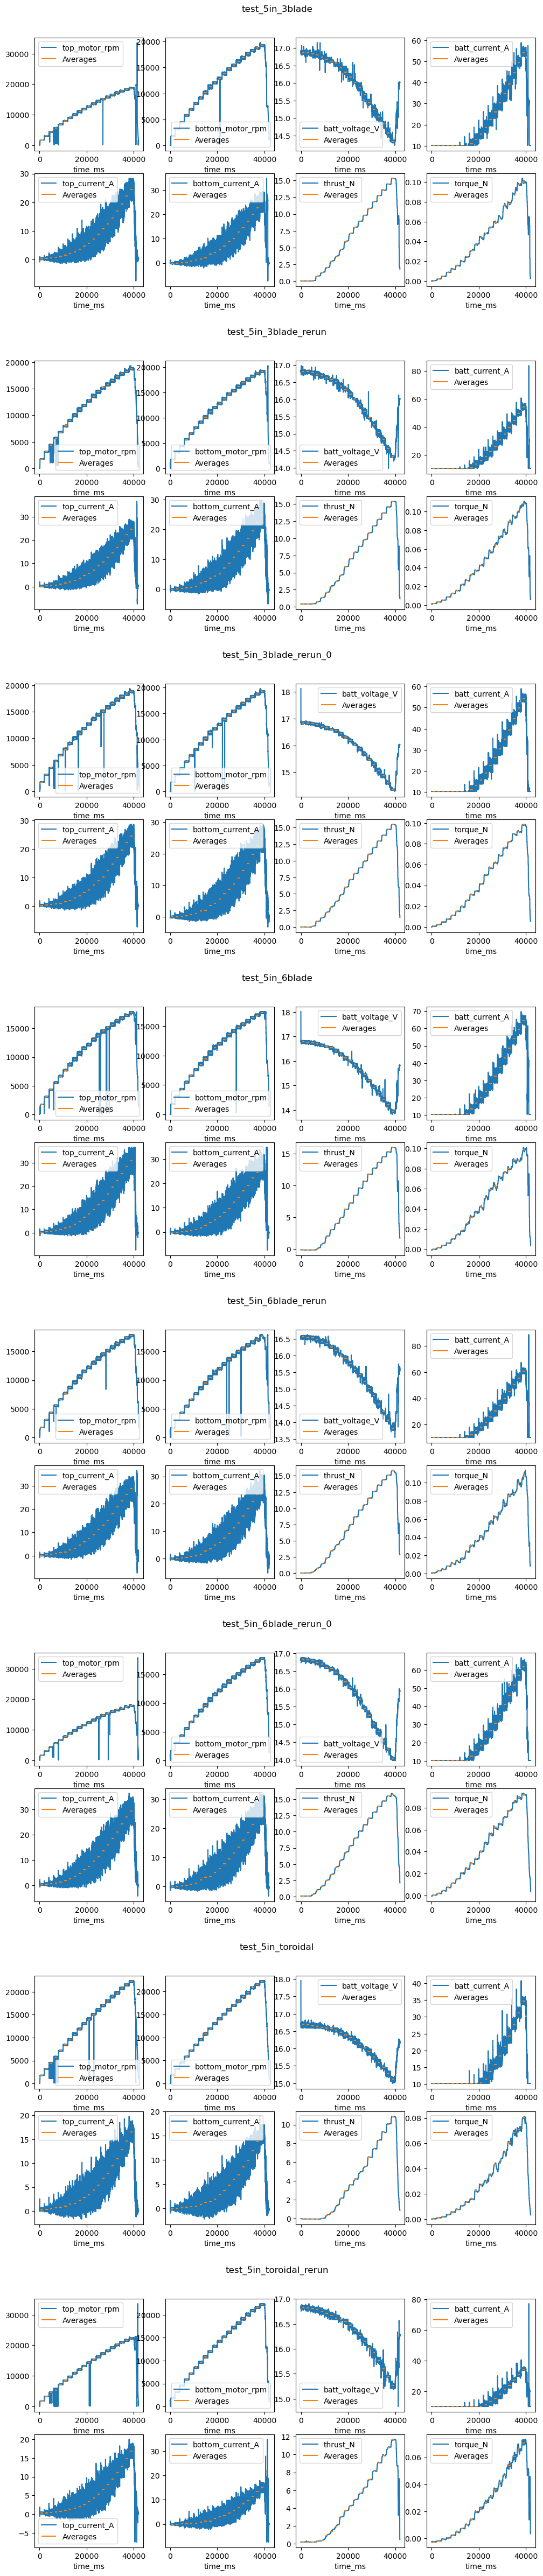

In [196]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [199]:
thrust_mean_g = df_steps["thrust_N"] / 9.81 * 1e3
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)
hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"] + df_steps["bottom_current_A"]
batt_voltage_mean = df_steps["batt_voltage_V"]
batt_power_mean = hall_current_mean * batt_voltage_mean

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
    }
)
df_thrust_power.loc["test_5in_toroidal_rerun"]

,thrust_mean_g,batt_power_mean,thrust_power_g_W
throttle,,,
5,18.492908,1.920805,9.627686
10,19.528645,5.085964,3.839713
15,17.692507,9.538932,1.854768
20,26.682033,12.657264,2.108041
25,35.522921,19.022910,1.867376
30,89.704390,25.061298,3.579399
35,141.109396,34.074281,4.141229
40,198.412206,46.091272,4.304767
45,304.303992,55.056021,5.527170


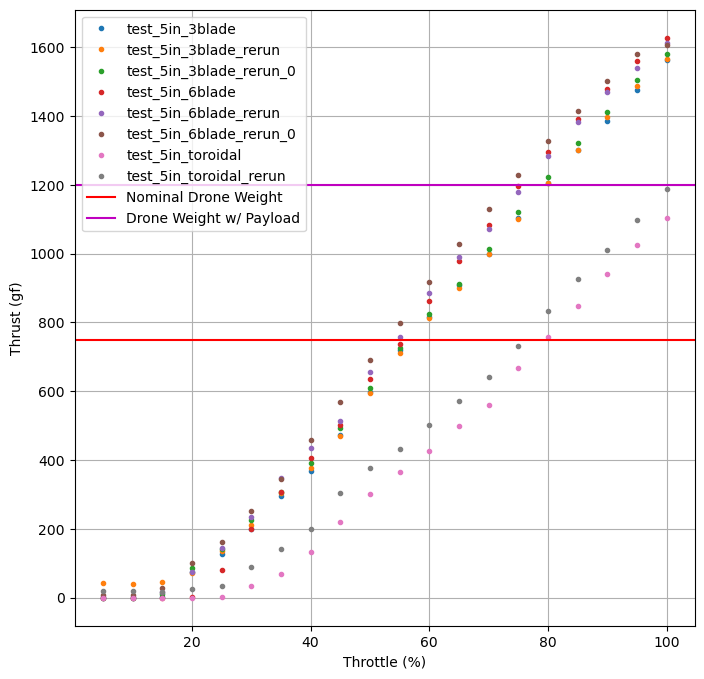

In [201]:
thrust_mean_g.unstack("test_name").plot(style=".", figsize=(8, 8))
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [202]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

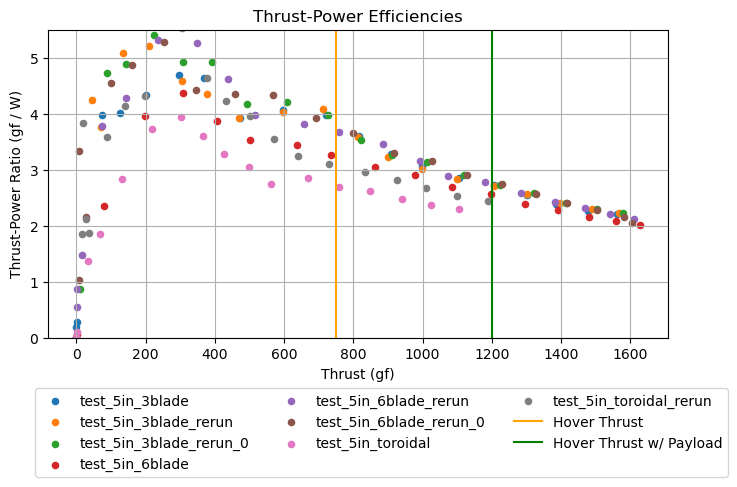

In [206]:
fig = plt.figure(figsize=(8, 4))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n, s=20)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

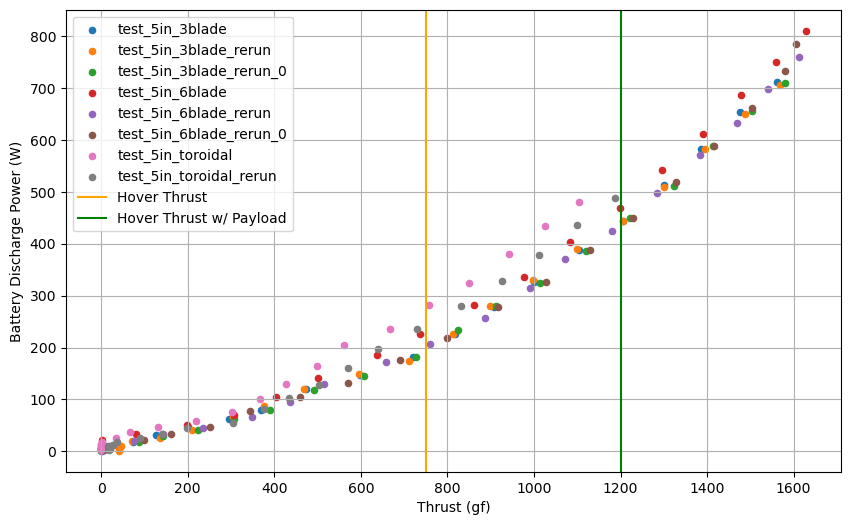

In [207]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
plt.grid()
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [208]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name               thrust_mean_g                               
test_5in_3blade         750.0          56.532368       194.988291   
                        1200.0         79.687104       439.649163   
test_5in_3blade_rerun   750.0          56.902425       194.364022   
                        1200.0         79.772880       441.837237   
test_5in_3blade_rerun_0 750.0          56.215525       194.903622   
                        1200.0         78.878982       435.344575   
test_5in_6blade         750.0          55.555152       232.594791   
                        1200.0         75.104333       470.201963   
test_5in_6blade_rerun   750.0          54.559476       204.114709   
                        1200.0         75.938732       438.087792   
test_5in_6blade_rerun_0 750.0          52.754020       199.748557   
                        1200.0         73.560964       431.485662   
test_5in_toroidal       750.0          79.533246       277.476235   
                        1200.0               NaN              NaN   
test_5in_toroidal_rerun 750.0          75.947545       244.703222   
                        1200.0               NaN              NaN   

                                       thrust_power_g_W  
test_name               thrust_mean_g                    
test_5in_3blade         750.0                  3.865117  
                        1200.0                 2.730330  
test_5in_3blade_rerun   750.0                  3.890602  
                        1200.0                 2.716562  
test_5in_3blade_rerun_0 750.0                  3.870013  
                        1200.0                 2.761376  
test_5in_6blade         750.0                  3.229140  
                        1200.0                 2.552638  
test_5in_6blade_rerun   750.0                  3.676573  
                        1200.0                 2.744060  
test_5in_6blade_rerun_0 750.0                  3.768446  
                        1200.0                 2.785969  
test_5in_toroidal       750.0                  2.705124  
                        1200.0                      NaN  
test_5in_toroidal_rerun 750.0                  3.068592  
                        1200.0                      NaN

In [213]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                thrust_mean_g
test_5in_3blade          750.0           0 days 00:07:44.520200601
                         1200.0          0 days 00:03:26.018815993
test_5in_3blade_rerun    750.0           0 days 00:07:46.012171627
                         1200.0          0 days 00:03:24.998566082
test_5in_3blade_rerun_0  750.0           0 days 00:07:44.721993716
                         1200.0          0 days 00:03:28.055882934
test_5in_6blade          750.0           0 days 00:06:29.415427056
                         1200.0          0 days 00:03:12.632117835
test_5in_6blade_rerun    750.0           0 days 00:07:23.750479927
                         1200.0          0 days 00:03:26.753079258
test_5in_6blade_rerun_0  750.0           0 days 00:07:33.450083921
                         1200.0          0 days 00:03:29.916592797
test_5in_toroidal        750.0           0 days 00:05:26.427955556
                         1200.0                                NaT
test_5in_toroidal_rerun

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

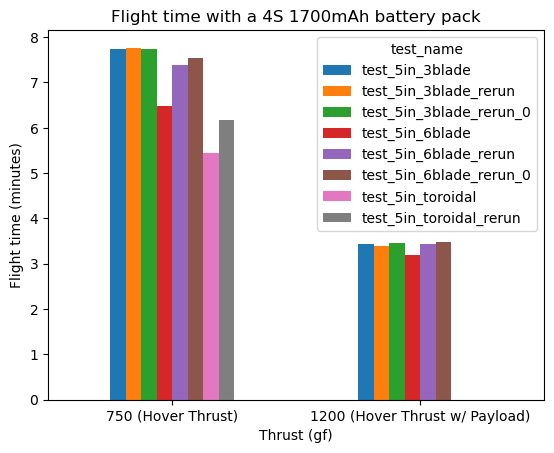

In [215]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)